# Funathon 2023 - Sujet 5

Responsables :
- Antoine Palazzolo, SSP Lab
- Romain Avouac, DIIT

# Analyse textuelle des commentaires clients de services de commande de repas en ligne

## Avant de commencer...

Ce sujet, disponible uniquement en Python, porte sur deux thématiques principales :
- Le web scraping
- Le NLP

Les deux parties sont indépendantes l'une de l'autre, il est donc possible de n'en faire qu'une des deux.

Si jamais vous n'êtes pas familiers avec l'un de ces sujets (ou les deux), nous ne saurions que trop vous recommander de jeter un oeil aux ressources suivantes :
- Débuter en web scraping : https://pythonds.linogaliana.fr/webscraping/
- Web scraping et bonnes pratiques : https://github.com/InseeFrLab/formation-webscraping
- Débuter en NLP : https://pythonds.linogaliana.fr/course/nlp/

Exécutez la cellule ci-dessous pour installer les packages nécessaires au sujet :

In [12]:
!pip install -r requirements.txt

## Partie 1 : Scraping d'avis sur Trustpilot

Pour pouvoir faire de l'analyse textuelle de commentaires clients, la première chose dont nous avons besoin c'est justement d'une base d'avis et de commentaires.
Vous pourrez trouver de tels avis sur à peu près n'importe quel site de vente en ligne ou bien sur un certain nombre de comparateurs.
En revanche, comment récupérer l'information depuis une page Internet pour nous constituer un jeu de données sur lequel travailler ?

Eh bien c'est justement là qu'intervient le web scraping, qui permet de collecter automatiquement de l'information d'un site web, que ce soit du texte, des images, des tableaux, sans avoir à parcourir toutes les pages soi-même en faisant un copier-coller à la main du contenu.
Le web scraping est donc un outil très puissant, mais à utiliser avec des pincettes.
Cela doit plutôt être vu comme un dernier recours, lorsqu'il n'est pas possible d'accéder aux données plus facilement.

En effet, de nombreuses contraintes juridiques encadrent par exemple le webscraping, il n'est pas possible de faire ce que l'on veut.
Qui plus est, de plus en plus de sites apprennent à se défendre contre cette collecte automatique de leurs données, rendant la tâche plus difficile.
Pour en savoir plus sur ces thématiques, n'hésitez pas à consulter cette formation : https://inseefrlab.github.io/formation-webscraping/.

<br>

Les données mises à disposition pour ce sujet ont été extraites du site https://fr.trustpilot.com/.
Votre première tâche va être de créer votre propre scraper pour pouvoir recréer une base similaire.

Afin de ne pas surcharger le traffic du site, nous n'allons pas vous demander d'en scraper l'intégralité.
Vous allez donc vous limiter à une entreprise de votre choix parmi celles de la catégorie _takeaway_ : https://fr.trustpilot.com/categories/takeaway.
Cliquez sur le lien et promenez-vous sur le site.

### 1. Bien préparer son scraping : découvrir le site ciblé

La première chose à faire pour tout bon adepte de scraping, c'est apprendre à connaître la page web cible :
- A quoi ressemble l'url du site ? Y a-t-il un radical commun lorsque l'on passe d'une page à une autre ? Par exemple ici lorsque l'on change d'entreprise comparée ou que l'on va chercher les avis les plus reculés ?
- Quelles sont les informations disponibles sur la page ? Y a-t-il besoin de cliquer sur un bouton pour les faire apparaître ?
- Les différentes pages que je souhaite scraper ont-elles bien des formats similaires ? La construction des pages change-t-elle d'une entreprise comparée à une autre ?

<br>

Il faut ensuite aller un peu plus loin dans l'analyse et regarder la structure HTML de la page ciblée.
Si vous n'êtes pas familiers avec cette partie, n'hésitez pas à consulter les ressources précédemment citées.

Tout d'abord, choisissez l'entreprise dont vous allez extraire les commentaires et cliquez sur sa page Trustpilot.
A présent, après un clic droit sur un élément de la page, il suffit de cliquer sur "Inspecter l'élément" pour naviguer dans l'architecture de la page et analyser le positionnement de l'élément sélectionné.
Cliquez sur divers éléments de la page pour vous familiariser avec sa structure.
- Comment sont rangés les commentaires ? Comprenez-vous bien l'arborescence de la page ?
- Regardez les balises autour de chaque note, y a-t-il un pattern ou un élément commun qui permet de les identifier et les distinguer des autres ?

### 2. Premiers pas : récupérer l'information du nombre de pages

#### Variables globales

In [6]:
url_trustpilot = '' # TODO
company = '' # TODO

url_company = url_trustpilot + company

Maintenant que vous avez votre premier lien à scraper, il va falloir envoyer une __requête__ au site pour demander à en récupérer le contenu, sous le format HTML.
C'est sur le contenu retourné que nous travaillerons ensuite.

En Python, un package permet facilement de faire ces requêtes, il s'agit de _requests_, et plus précisément de la fonction ```requests.get()```.
En plus du lien à requêter, la fonction peut prendre d'autres arguments, appelés __headers__, comme _User_Agent_ ou _From_ qui permettent de s'identifier lors de la requête envoyée au site.

Pourquoi s'identifier me demanderez-vous ? Eh bien tout d'abord parce qu'il s'agit là d'une bonne pratique de scraping.
Les sites reçoivent parfois énormément de requêtes sur leurs pages, par exemple à cause de scrapers trop gourmands, et cela peut leur créer des problèmes.
Ils peuvent donc être amenés à par exemple bloquer les adresses IP des utilisateurs jugés abusifs.
S'identifier clairement dans ses requêtes, en explicitant le but de la collecte, permet de faire preuve de transparence.
Même si en pratique cela n'arrive que très peu,Cela laisse alors la possibilité au propriétaire du site de contacter le scraper afin d'avoir plus d'informations sur le but de la collecte, et possiblement offrir l'accès aux données sans scraping.

Complétez les headers ci-dessous avec vos informations pour faire preuve de transparence auprès de Trustpilot :

In [8]:
headers = {
    'User-Agent': '', # Nom, entité, but de la collecte, informations pertinentes
    'From': '' # Coordonnées à laisser au propriétaire du site en cas de besoin
}

#### Créer sa première requête

In [9]:
import requests

Utilisez la fonction ```requests.get()``` et vos headers pour requêter votre site, puis utilisez la méthode ```.text``` pour récupérer le contenu HTML de la page désirée sous forme de texte.

In [14]:
request_text = '' # TODO

print(request_text)

<html><body>We have received an unusually large amount of requests from your IP so you have been rate limited</body></html>



Si vous avez bien fait les choses, vous devriez maintenant avoir quelque chose d'assez illisible, c'est normal.
Il va maintenant falloir faire appel à un autre package pour __parser__ cette chaîne de caractères en une arborescence plus exploitable.

#### Parsing d'un document HTML : BeautifulSoup

La fonction ```BeautifulSoup()```, du package du même nom, est ce qui va nous permettre de faire ce parsing.
Rien de tel que l'essayer sur notre texte pour voir quel est son effet :

In [15]:
from bs4 import BeautifulSoup

In [17]:
soup = '' # TODO

print(soup)

<html><body>We have received an unusually large amount of requests from your IP so you have been rate limited</body></html>



Normalement ça a déjà une meilleure tête !
L'idée maintenant va être de naviguer parmi l'arborescence des balises pour aller chercher l'information que l'on souhaite.

#### Chercher un élément dans l'arborescence

In [ ]:
Deux méthodes sont particulièrement utiles lorsque l'on travaille avec BeautifulSoup :



### Fonctions

#### Scraping one review

In [57]:
def get_note_review(review):
    
    try:
        texte_note = review.find(
            'div', {'class':'star-rating_starRating__4rrcf star-rating_medium__iN6Ty'}
        ).find('img', alt=True)['alt']
        note = int(texte_note[5])  # texte_note = "Noté x étoiles sur 5"
        return note

    except:
        return "Not found"

In [58]:
def get_time_review(review):
    
    try:
        str_date = review.find(
            'div', {'class':'typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_datesWrapper__RCEKH'}
        ).find('time')['datetime']
        date = datetime.strptime(str_date, "%Y-%m-%dT%H:%M:%S.%fZ")  # str_date = 'YYYY-MM-DDThh:mm:ss.000Z'
        return date

    except:
        return "Not found"

In [59]:
def get_title_review(review):
    
    try:
        title = review.find(
            'h2', {'class':'typography_heading-s__f7029 typography_appearance-default__AAY17'}
        ).text
        return title

    except:
        return "Not found"

In [60]:
def get_comment_review(review):
    
    try:
        text = review.find(
            'p', {'class':'typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn'}
        ).text # Les balises <br> sont supprimées, on va donc forcer des espaces après les points
        text = re.sub(' +', ' ', text.replace('.', '. '))
        return text

    except:
        return "Not found"

#### Scraping one company

In [61]:
def get_nb_pages_reviews(url_company):

    time.sleep(1)
    request_text = requests.get(url_company, headers=headers).text
    soup = BeautifulSoup(request_text, 'html.parser')

    try:
        boutons_pages = soup.find(
            'div', {'class':'styles_pagination__6VmQv'}
        ).find_all(
            'span', {'class':'typography_heading-xxs__QKBS8 typography_appearance-inherit__D7XqR typography_disableResponsiveSizing__OuNP7'}
        )
        last_page = int(boutons_pages[-2].text)  # Dernier bouton = "Page Suivante"
        return last_page

    except:
        return 0

In [62]:
def scraping_one_company(company, limit_pages=False):

    print(company)
    url_company = url_trustpilot+company
    nb_pages = get_nb_pages_reviews(url_company)
    if limit_pages and nb_pages > 2:
        nb_pages = 2
    notes, times, titles, comments = [], [], [], []

    for page in tqdm(range(1, nb_pages+1)):

        time.sleep(1)
        url_page = url_company + '?page=' + str(page)
        
        try:
            request_text = requests.get(url_page, headers=headers).text
            soup = BeautifulSoup(request_text, 'html.parser')
            reviews = soup.find_all(
                'div', {'class':'styles_cardWrapper__LcCPA styles_show__HUXRb styles_reviewCard__9HxJJ'}
            )
        except:
            reviews = []

        notes.extend(list(map(get_note_review, reviews)))
        times.extend(list(map(get_time_review, reviews)))
        titles.extend(list(map(get_title_review, reviews)))
        comments.extend(list(map(get_comment_review, reviews)))

    df_reviews = pd.DataFrame({
        'note': notes,
        'date': times,
        'title': titles,
        'comment': comments
    })

    return df_reviews


#### Scraping all companies

In [63]:
def scraping_all_companies(companies_list=target_companies,
                           limit_pages=False):

    reviews_companies = list(map(
        partial(scraping_one_company, limit_pages=limit_pages),
                companies_list
    ))
    n = len(companies_list)
    for i in range(n):
        reviews_companies[i]['company'] = companies_list[i]
    df_all_reviews = pd.concat(reviews_companies)
    
    return df_all_reviews

### Mise en pratique

In [64]:
if do_scraping:
    df_all_reviews = scraping_all_companies(
        # limit_pages=True
    )
else:
    os.system(f"mc cp s3/projet-funathon/2023/sujet5/reviews_takeaway.parquet reviews_takeaway.parquet")
    df_all_reviews = pd.read_parquet("reviews_takeaway.parquet")

`s3/projet-funathon/2023/sujet5/reviews_takeaway.parquet` -> `reviews_takeaway.parquet`
Total: 0 B, Transferred: 2.77 MiB, Speed: 13.03 MiB/s


In [65]:
print(f'{len(df_all_reviews)} avis réunis')

df_all_reviews.head()

20438 avis réunis


,note,date,title,comment,company
0,3,2023-05-16 14:07:58,Des produits manquants pour une…,"Des produits manquants pour une recette, conta...",hellofresh.fr
1,5,2023-05-16 13:08:14,Facile et pratique,Les box hellofresh nous facilitent le quotidie...,hellofresh.fr
2,4,2023-05-14 20:08:49,Super idée recettes délicieuses.,Super idée recettes délicieuses. Tous les ingr...,hellofresh.fr
3,1,2023-05-16 19:33:36,Service de livraison incompétent !,"Jusqu’à présent satisfait de la marque, mais u...",hellofresh.fr
4,1,2023-05-15 17:02:04,Expérience d'achat inacceptable,Expérience d'achat inacceptable. Une chaîne du...,hellofresh.fr


In [66]:
df_problemes = df_all_reviews[df_all_reviews.apply(lambda row: row.str.contains('Not found').any(), axis=1)]
df_problemes

,note,date,title,comment,company
176,5,2023-05-16 13:57:25,Je recommande c'est top,Not found,hellofresh.fr
180,1,2023-05-13 11:01:50,Colis toujours pas livré,Not found,hellofresh.fr
189,3,2023-05-09 00:03:41,Quantité beaucoup trop peu,Not found,hellofresh.fr
192,5,2023-05-10 11:07:27,Parfait nous adorons le concept,Not found,hellofresh.fr
194,5,2023-05-10 10:44:19,Très bonne recette et facile,Not found,hellofresh.fr
...,...,...,...,...,...
20251,1,2023-01-10 11:42:23,grosse Arnaque,Not found,kitchentrotter.com
20252,1,2020-04-01 08:20:29,Une bande d'escrocs via cdiscount !!!,Not found,kitchentrotter.com
20253,1,2021-03-02 10:58:32,je porte plainte !!!!,Not found,kitchentrotter.com
20362,1,2019-04-12 13:51:56,Je ne me suis jamais inscrite!!!,Not found,kitchentrotter.com


In [67]:
df_problemes[df_problemes['comment'] != "Not found"]

,note,date,title,comment,company


In [68]:
df_all_reviews.to_parquet("reviews_takeaway.parquet", index=False)

In [69]:
os.system(f"mc cp reviews_takeaway.parquet s3/projet-funathon/2023/sujet5/reviews_takeaway.parquet")

`/home/onyxia/work/funathon2023_sujet5/reviews_takeaway.parquet` -> `s3/projet-funathon/2023/sujet5/reviews_takeaway.parquet`
Total: 0 B, Transferred: 2.77 MiB, Speed: 4.35 MiB/s


0

## Utilisation des avis

### Regarder les notes

(array([ 1764.,   710.,  1780.,  4830., 11354.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

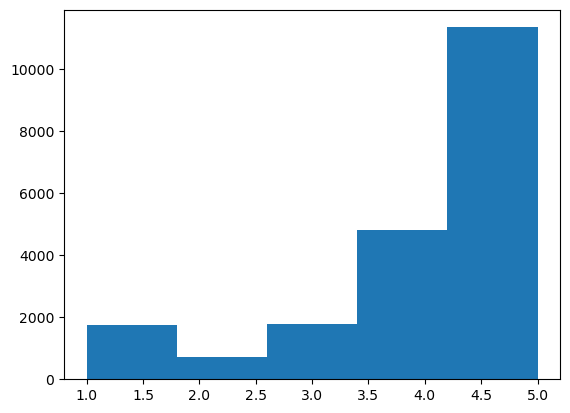

In [70]:
plt.hist(df_all_reviews['note'], bins=5)

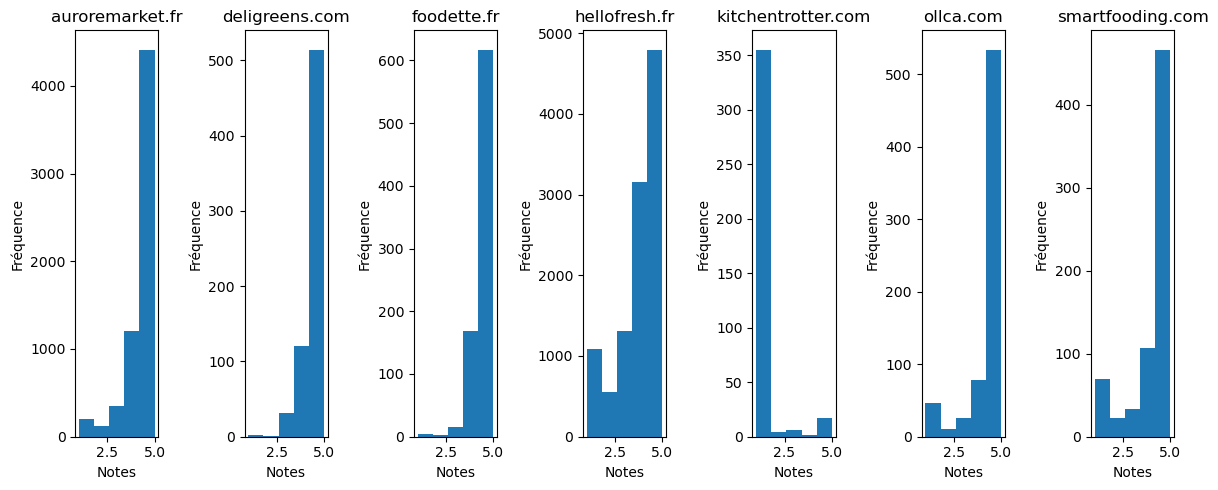

In [71]:
df_all_reviews_by_company = df_all_reviews.groupby('company')['note'].apply(list)

# Créer une grille de sous-graphiques
n_companies = len(df_all_reviews_by_company)
fig, axes = plt.subplots(nrows=1, ncols=n_companies, figsize=(12, 5))

# Parcourir les données et créer un histogramme pour chaque entreprise sur un sous-graphique distinct
for i, (company, notes) in enumerate(df_all_reviews_by_company.items()):
    ax = axes[i]  # Sélectionner le sous-graphique correspondant
    ax.hist(notes, bins=5)  # Créer l'histogramme
    ax.set_xlabel('Notes')  # Définir l'étiquette de l'axe x pour le sous-graphique
    ax.set_ylabel('Fréquence')  # Définir l'étiquette de l'axe y pour le sous-graphique
    ax.set_title(company)  # Définir le titre du sous-graphique

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()

### Regarder les commentaires

#### Longueurs des commentaires

In [72]:
df_all_reviews['len_title'] = df_all_reviews['title'].str.len()
df_all_reviews['len_comment'] = df_all_reviews['comment'].str.len()

(array([3.014e+03, 5.123e+03, 4.028e+03, 7.406e+03, 4.700e+02, 1.990e+02,
        1.100e+02, 3.500e+01, 2.000e+01, 8.000e+00, 5.000e+00, 6.000e+00,
        3.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 3.000e+00]),
 array([  2. ,  11.9,  21.8,  31.7,  41.6,  51.5,  61.4,  71.3,  81.2,
         91.1, 101. , 110.9, 120.8, 130.7, 140.6, 150.5, 160.4, 170.3,
        180.2, 190.1, 200. ]),
 <BarContainer object of 20 artists>)

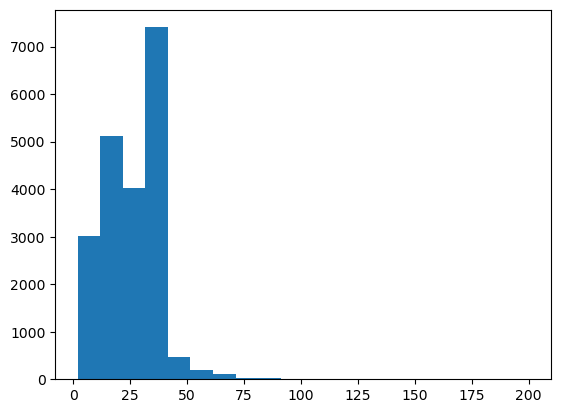

In [73]:
plt.hist(df_all_reviews['len_title'], bins=20)

(array([1.5351e+04, 3.7000e+03, 8.5500e+02, 2.8200e+02, 1.2100e+02,
        5.0000e+01, 2.7000e+01, 2.0000e+01, 1.2000e+01, 7.0000e+00,
        5.0000e+00, 3.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   9. ,  248.8,  488.6,  728.4,  968.2, 1208. , 1447.8, 1687.6,
        1927.4, 2167.2, 2407. , 2646.8, 2886.6, 3126.4, 3366.2, 3606. ,
        3845.8, 4085.6, 4325.4, 4565.2, 4805. ]),
 <BarContainer object of 20 artists>)

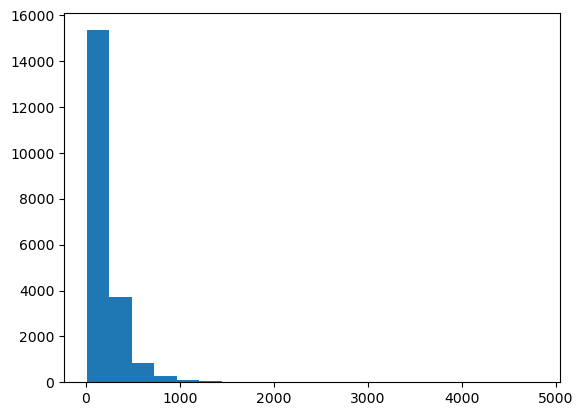

In [74]:
plt.hist(df_all_reviews['len_comment'], bins=20)

(array([3315., 4635., 3324., 2389., 1716., 1232.,  976.,  663.,  487.,
         381.,  239.,  194.,  179.,  125.,   83.,   86.,   61.,   54.,
          34.,   37.,   34.,   25.,   21.,   17.,   14.,   11.,   12.,
           5.,   10.,   13.]),
 array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
         900.,  950., 1000., 1050., 1100., 1150., 1200., 1250., 1300.,
        1350., 1400., 1450., 1500.]),
 <BarContainer object of 30 artists>)

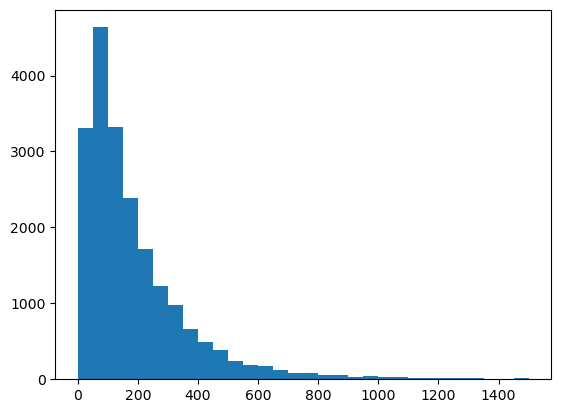

In [75]:
plt.hist(df_all_reviews['len_comment'], bins=30, range=(0,1500))

#### Nuage de mots

In [76]:
stopwords_fr = set(stopwords.words('french'))

# Ajouter les mots "not" et "found" à la liste des stopwords
stopwords_fr.update(["not", "found"])

# Ajouter manuellement les observations inintéressantes
stopwords_fr.update(["c'est", "j'ai", "donc"])

In [77]:
# Concaténer tous les commentaires en une seule chaîne de caractères
all_comments = ' '.join(df_all_reviews['comment'])

# Tokenization des commentaires en mots individuels
tokens = word_tokenize(all_comments)

# Filtrer les mots avec les stopwords en français
filtered_tokens = [word.lower() for word in tokens if word.lower() not in stopwords_fr]

In [78]:
# Créer un nuage de mots avec les mots filtrés
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_tokens))

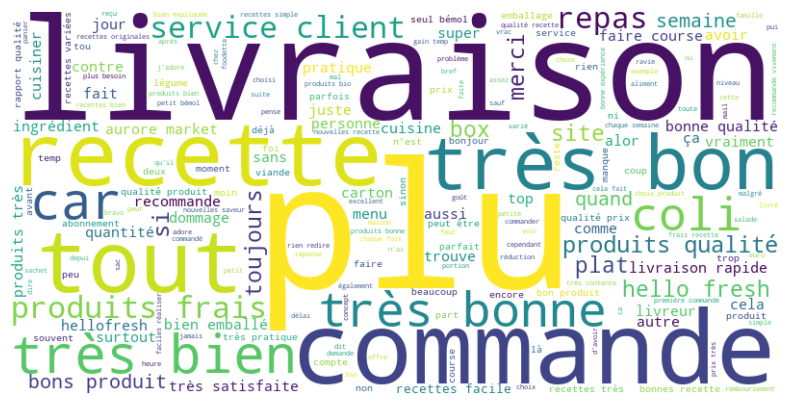

In [79]:
# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

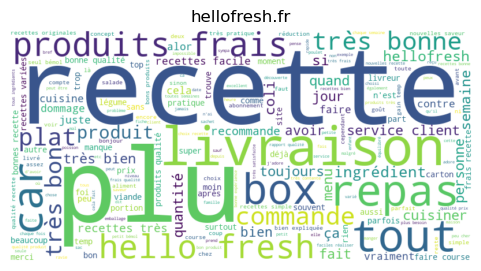

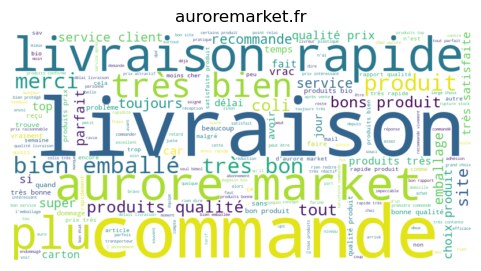

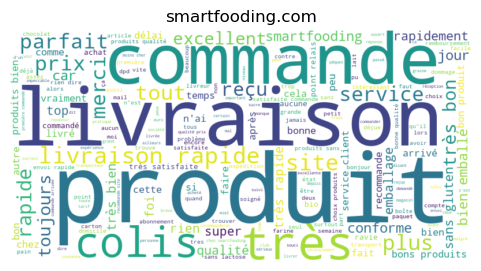

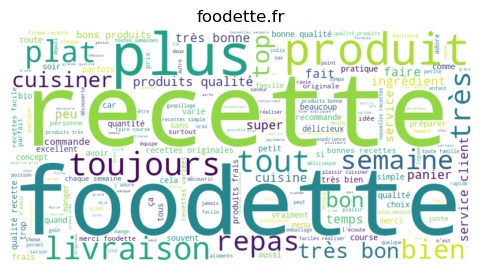

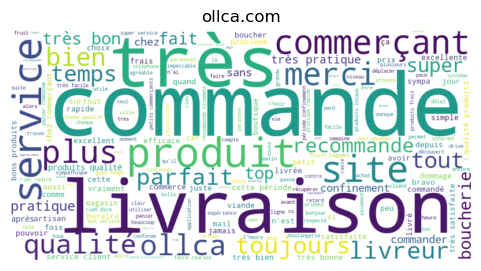

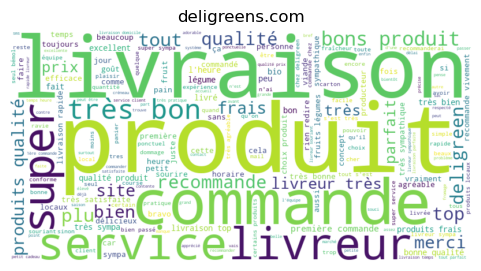

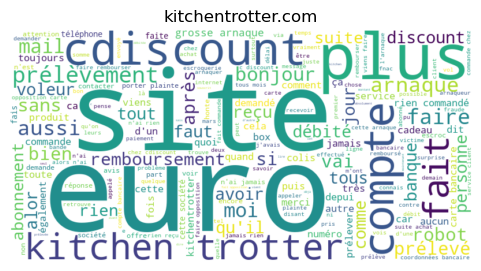

In [82]:
# Créer un nuage de mots pour chaque valeur de 'company'
for company in target_companies:
    # Filtrer les commentaires pour la valeur de 'company' spécifique
    comments = df_all_reviews[df_all_reviews['company'] == company]['comment']
    
    # Concaténer tous les commentaires en une seule chaîne de caractères
    all_comments = ' '.join(comments)

    # Tokenization des commentaires en mots individuels
    tokens = word_tokenize(all_comments)

    # Filtrer les mots avec les stopwords en français
    filtered_tokens = [word.lower() for word in tokens if word.lower() not in stopwords_fr]

    # Créer un nuage de mots avec les mots filtrés
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_tokens))

    # Afficher le nuage de mots avec le nom de la société
    plt.figure(figsize=(6, 3))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(company)
    plt.axis('off')
    plt.show()